<center>

###Práctica de indicxadores sobre las tendencias de empleo a nibvel mundial

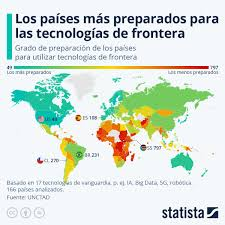

</center>

In [1]:
import pandas as pd
import numpy as np
import random #para generar numero aleatorios
import matplotlib.pyplot as plt #generar graficos

In [3]:
from google.colabº import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colabo'

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Tareas de almacenes e indicadores /Indicators.csv')

In [5]:
data.shape

(5656458, 6)

In [7]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [9]:
# aplicamos un filtro para obtener la informaion de mexico

filter = data['CountryName'] == 'Mexico'
data[filter].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
15224,Mexico,MEX,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.164508e+02
15225,Mexico,MEX,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,9.721359e+01
15226,Mexico,MEX,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.633732e+00
15227,Mexico,MEX,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,9.057986e+01
15228,Mexico,MEX,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,9.000000e+06


In [11]:
# contar los paises que existend en la base de datos

countries = data['CountryName'].unique().tolist()

print('Paises en la base de datos de indicadores: ', len(countries))

Paises en la base de datos de indicadores:  247


In [12]:
# visualixzar todos los paises

print(countries)

['Arab World', 'Caribbean small states', 'Central Europe and the Baltics', 'East Asia & Pacific (all income levels)', 'East Asia & Pacific (developing only)', 'Euro area', 'Europe & Central Asia (all income levels)', 'Europe & Central Asia (developing only)', 'European Union', 'Fragile and conflict affected situations', 'Heavily indebted poor countries (HIPC)', 'High income', 'High income: nonOECD', 'High income: OECD', 'Latin America & Caribbean (all income levels)', 'Latin America & Caribbean (developing only)', 'Least developed countries: UN classification', 'Low & middle income', 'Low income', 'Lower middle income', 'Middle East & North Africa (all income levels)', 'Middle East & North Africa (developing only)', 'Middle income', 'North America', 'OECD members', 'Other small states', 'Pacific island small states', 'Small states', 'South Asia', 'Sub-Saharan Africa (all income levels)', 'Sub-Saharan Africa (developing only)', 'Upper middle income', 'World', 'Afghanistan', 'Albania', '

In [14]:
# obtewnemos los años de la base de datos

years = data['Year'].unique().tolist()
print(years)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [15]:
print('Año inicial', min(years))
print('Año final', max(years))

Año inicial 1960
Año final 2015


In [19]:
# buscamos las emisione dde CO2 en mexico

hist_indicador = 'CO2 emissions \(metric'
hist_country = 'Mexico'

mask1 = data['IndicatorName'].str.contains(hist_indicador) #CO2
mask2 = data['CountryName'].str.contains(hist_country) #Mexico

total_co2 = data[mask1 & mask2]
total_co2.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4416391,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2007,4.055762
4596283,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2008,4.126988
4775336,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2009,3.857150
4959437,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2010,3.752091
5139492,Mexico,MEX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,3.876108


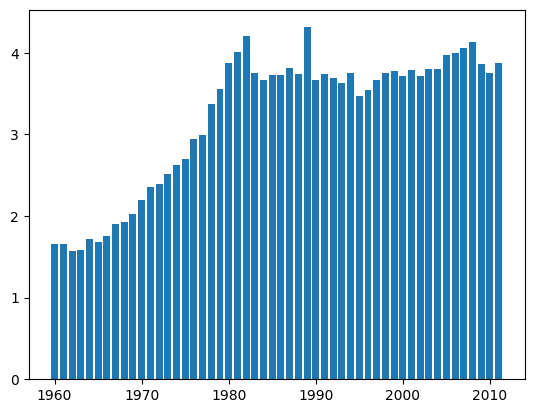

In [20]:
# visualizar la informacion en un grafico

years = total_co2['Year']

co2 = total_co2['Value']

plt.bar(years, co2)
plt.show()

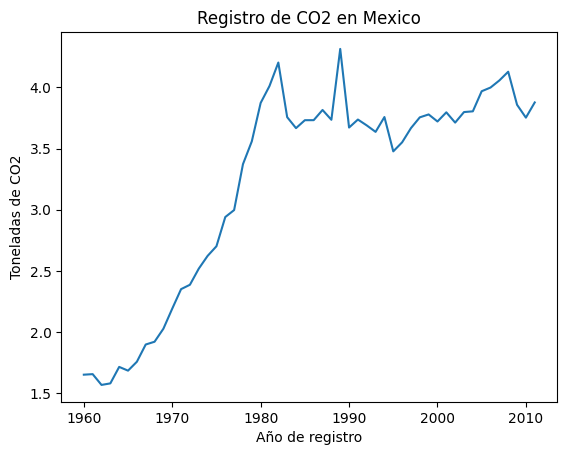

In [22]:
plt.plot(total_co2['Year'], total_co2['Value'])
plt.ylabel('Toneladas de CO2')
plt.xlabel('Año de registro')
plt.title('Registro de CO2 en Mexico')

plt.show()

# obtener el PIB de Mexico

In [28]:
# buscar el PIB

hist_indicador = 'GDP per capita \(constant 2005'
mask1 = data['IndicatorName'].str.contains(hist_indicador) #PIB
hist_country = 'MEX'
mask2 = data['CountryCode'].str.contains(hist_country) #Mexico
gdp_stage = data[mask1 & mask2]
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
15274,Mexico,MEX,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,3342.487647
40716,Mexico,MEX,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,3400.921577
68514,Mexico,MEX,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,3449.617605
97078,Mexico,MEX,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,3614.542230
125989,Mexico,MEX,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,3921.051025


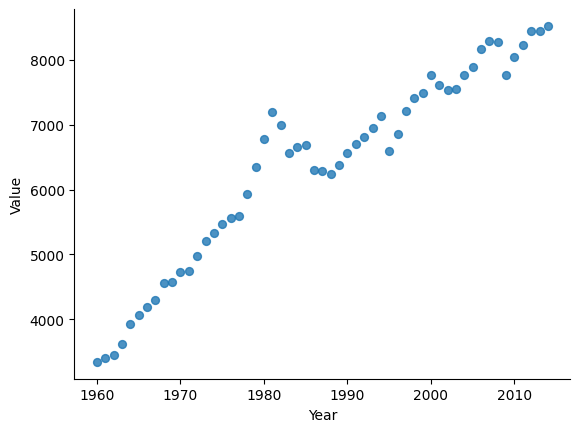

In [29]:
# @title Year vs Value

from matplotlib import pyplot as plt
gdp_stage.plot(kind='scatter', x='Year', y='Value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

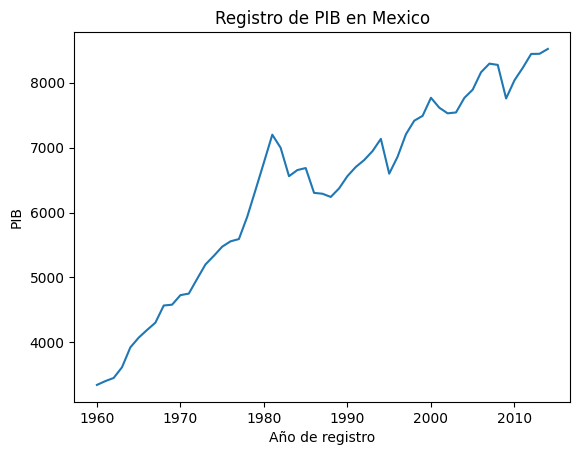

In [30]:
plt.plot(gdp_stage['Year'], gdp_stage['Value'])
plt.ylabel('PIB')
plt.xlabel('Año de registro')
plt.title('Registro de PIB en Mexico')

plt.show()

In [33]:
print('PIB año minimo: ', gdp_stage['Year'].min(), 'PIB año maximo: ', gdp_stage['Year'].max())
print('CO2 año minimo', total_co2['Year'].min(), 'CO2 año maximo', total_co2['Year'].max())

PIB año minimo:  1960 PIB año maximo:  2014
CO2 año minimo 1960 CO2 año maximo 2011


In [36]:
gdp_stage_new = gdp_stage[gdp_stage['Year']<2012]
print(len(gdp_stage_new))
print(len(total_co2))

52
52


In [35]:
gdp_stage_new.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
15274,Mexico,MEX,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,3342.487647
40716,Mexico,MEX,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,3400.921577
68514,Mexico,MEX,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,3449.617605
97078,Mexico,MEX,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,3614.542230
125989,Mexico,MEX,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,3921.051025


In [38]:
print('PIB año minimo: ', gdp_stage_new['Year'].min(), 'PIB año maximo: ', gdp_stage_new['Year'].max())
print('CO2 año minimo', total_co2['Year'].min(), 'CO2 año maximo', total_co2['Year'].max())

PIB año minimo:  1960 PIB año maximo:  2011
CO2 año minimo 1960 CO2 año maximo 2011


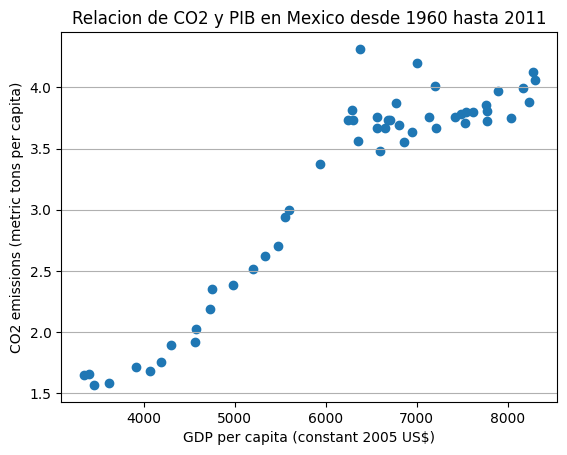

In [40]:
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('Relacion de CO2 y PIB en Mexico desde 1960 hasta 2011')
axis.set_xlabel(gdp_stage_new['IndicatorName'].iloc[0], fontsize = 10)
axis.set_ylabel(total_co2['IndicatorName'].iloc[0], fontsize = 10)
x = gdp_stage_new['Value']
y = total_co2['Value']
axis.scatter(x, y)
plt.show()